In [1]:
import numpy as np
from scipy.stats import t

In [3]:
N_con = 20
df_con = N_con - 1 # degrees of freedom of Control 
N_exp = 20
df_exp = N_exp - 1 # degrees of freedom of Experimental 
alpha = 0.05

In [4]:
# data of control group with t-distribution
X_con = np.random.standard_t(df_con,N_con)
# data of experimental group with t-distribution
X_exp = np.random.standard_t(df_exp,N_exp)

In [5]:
# mean of control
mu_con = np.mean(X_con)
# mean of experimental
mu_exp = np.mean(X_exp)

In [6]:
# variance of control
sigma_sqr_con = np.var(X_con)
#variance of control
sigma_sqr_exp = np.var(X_exp)

# pooled variance
pooled_variance_t_test = ((N_con-1)*sigma_sqr_con + (N_exp -1) * sigma_sqr_exp)/(N_con + N_exp-2)*(1/N_con + 1/N_exp)

# Standard Error
SE = np.sqrt(pooled_variance_t_test)

# Test Statistics
T = (mu_con-mu_exp)/SE

# Critical value for two sided 2 sample t-test
t_crit = t.ppf(1-alpha/2, N_con + N_exp - 2)

# P-value of the two sided T-test using t-distribution and its symmetric property
p_value = t.sf(T, N_con + N_exp - 2)*2

# Margin of Error
margin_error = t_crit * SE
# Confidence Interval
CI = [(mu_con-mu_exp) - margin_error, (mu_con-mu_exp) + margin_error]

print("T-score: ", T)
print("T-critical: ", t_crit)
print("P_value: ", p_value)
print("Confidence Interval of 2 sample Z-test: ", np.round(CI,2))

T-score:  -1.5866417862321969
T-critical:  2.024394164575136
P_value:  1.8791187527689441
Confidence Interval of 2 sample Z-test:  [-0.84  0.1 ]


reject the null
7.832495206930039e-11
Test Statistics stat:  6.503782823926798
Z-critical:  1.959963984540054
P_value:  7.832495206930039e-11
Confidence Interval of 2 sample Z-test for proportions:  [0.02 0.04]


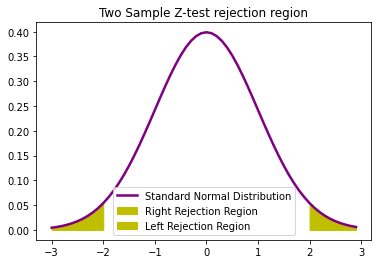

In [7]:
import numpy as np
from scipy.stats import norm

X_con = 1242 #clicks control
N_con = 9886 #impressions control
X_exp = 974 #clicks experimental
N_exp = 10072 #impressions experimetal

# Significance Level
alpha = 0.05

p_con_hat = X_con / N_con
p_exp_hat = X_exp / N_exp

p_pooled_hat = (X_con + X_exp)/(N_con + N_exp)
pooled_variance = p_pooled_hat*(1-p_pooled_hat) * (1/N_con + 1/N_exp)

# Standard Error
SE = np.sqrt(pooled_variance)

# test statsitics
Test_stat = (p_con_hat - p_exp_hat)/SE
# critical value usig the standard normal distribution
Z_crit = norm.ppf(1-alpha/2)

# Margin of error
m = SE * Z_crit
# two sided test and using symmetry property of Normal distibution so we multiple with 2
p_value = norm.sf(Test_stat)*2

# Confidence Interval
CI = [(p_con_hat-p_exp_hat) - SE * Z_crit, (p_con_hat-p_exp_hat) + SE * Z_crit]

if np.abs(Test_stat) >= Z_crit:
    print("reject the null")
    print(p_value)

print("Test Statistics stat: ", Test_stat)
print("Z-critical: ", Z_crit)
print("P_value: ", p_value)
print("Confidence Interval of 2 sample Z-test for proportions: ", np.round(CI,2))

import matplotlib.pyplot as plt
z = np.arange(-3,3,  0.1)
plt.plot(z, norm.pdf(z), label = 'Standard Normal Distribution',color = 'purple',linewidth = 2.5)
plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]), label = 'Right Rejection Region',color ='y' )
plt.fill_between(z[z<(-1)*Z_crit], norm.pdf(z[z<(-1)*Z_crit]), label = 'Left Rejection Region',color ='y' )
plt.title("Two Sample Z-test rejection region")
plt.legend()
plt.show()

Test Statistics stat:  0.6105340599962709
Z-critical:  1.959963984540054
P_value:  0.5415080881809692
Confidence Interval of 2 sample Z-test for proportions:  [-7.33 13.96]


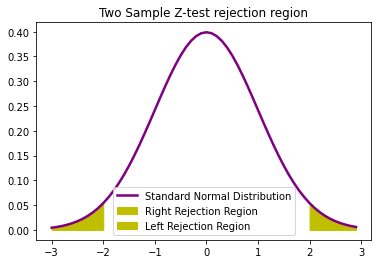

In [8]:
import numpy as np
from scipy.stats import norm

N_con = 60
N_exp = 60

# Significance Level
alpha = 0.05

X_A = np.random.randint(100, size = N_con)
X_B = np.random.randint(100, size = N_exp)

# Calculating means of control and experimental groups
mu_con = np.mean(X_A)
mu_exp = np.mean(X_B)

variance_con = np.var(X_A)
variance_exp = np.var(X_B)

# Pooled Variance
pooled_variance = np.sqrt(variance_con/N_con + variance_exp/N_exp)

# Test statistics
T = (mu_con-mu_exp)/np.sqrt(variance_con/N_con + variance_exp/N_exp)

# two sided test and using symmetry property of Normal distibution so we multiple with 2
p_value = norm.sf(T)*2

# Z-critical value
Z_crit  = norm.ppf(1-alpha/2)

# Margin of error
m = Z_crit*pooled_variance

# Confidence Interval
CI = [(mu_con - mu_exp) - m, (mu_con - mu_exp) + m]


print("Test Statistics stat: ", T)
print("Z-critical: ", Z_crit)
print("P_value: ", p_value)
print("Confidence Interval of 2 sample Z-test for proportions: ", np.round(CI,2))

import matplotlib.pyplot as plt
z = np.arange(-3,3,  0.1)
plt.plot(z, norm.pdf(z), label = 'Standard Normal Distribution',color = 'purple',linewidth = 2.5)
plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]), label = 'Right Rejection Region',color ='y' )
plt.fill_between(z[z<(-1)*Z_crit], norm.pdf(z[z<(-1)*Z_crit]), label = 'Left Rejection Region',color ='y' )
plt.title("Two Sample Z-test rejection region")
plt.legend()
plt.show()

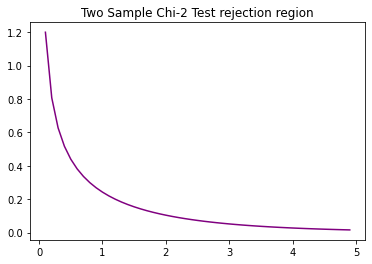

In [9]:
import numpy as np
from scipy.stats import chi2

O = np.array([86, 83, 5810,3920])
T = np.array([105,65,5781, 3841])

# Squared_relative_distance

def calculate_D(O,T):
    D_sum = 0
    for i in range(len(O)):
        D_sum += (O[i] - T[i])**2/T[i]
    return(D_sum)

D = calculate_D(O,T)
p_value = chi2.sf(D, df = 1)


import matplotlib.pyplot as plt
# Step 1: pick a x-axis range like in case of z-test (-3,3,0.1)
d = np.arange(0,5,0.1)
# Step 2: drawing the initial pdf of chi-2 with df = 1 and x-axis d range we just created
plt.plot(d, chi2.pdf(d, df = 1), color = "purple")
# Step 3: filling in the rejection region
plt.fill_between(d[d>D], chi2.pdf(d[d>D], df = 1), color = "y")
# Step 4: adding title
plt.title("Two Sample Chi-2 Test rejection region")
# Step 5: showing the plt graph
plt.show()

      0     1
0   225   Exp
1   208   Exp
2   220   Exp
3   193   Exp
4   202   Exp
..  ...   ...
95  203  Cont
96  205  Cont
97  210  Cont
98  207  Cont
99  202  Cont

[100 rows x 2 columns]
Mean of X_bar_exp - X_bar_con -0.8741155356023285
Standard Error of X_bar_exp - X_bar_con 0.225868249664952
CI of X_bar_exp - X_bar_con [-1.3168091701967355, -0.4314219010079214]


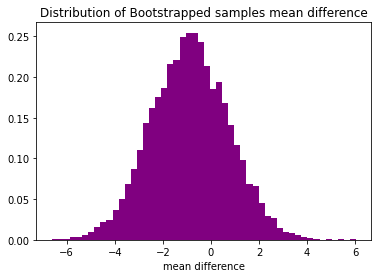

In [12]:
import numpy as np
import pandas as pd
from scipy.stats import norm

N = 100
X = pd.Series(np.random.binomial(300,0.7,size =N))
Y1 = np.repeat("Exp",N/2)
N_exp = len(Y1)
Y2 = np.repeat("Cont",N/2)
N_con = len(Y2)

Y = pd.Series(np.append(Y1,Y2))
data = pd.concat([X,Y],axis = 1)
print(data)
means_per_group = data.groupby(1, group_keys = False)[0].mean()
medians_per_group = data.groupby(1)[0].median()

alpha = 0.05
def Bootrapping_for_diff_means_medians(data,B):
    boot_mean_diff = []
    boot_medians_diff = []

    boot_means_con = []
    boot_means_exp = []

    count_num_positives_meandiff = 0
    count_num_positives_mediandiff = 0

    for i in range(B):

        boot_sample = data.sample(frac = 1, replace = True)

        #means of bootstrap sample for control and experimental group
        boot_means_per_group = boot_sample.groupby(1)[0].mean()
        boot_sample_mean_con = boot_means_per_group["Cont"]
        boot_sample_mean_exp = boot_means_per_group["Exp"]

        boot_means_con.append(boot_sample_mean_con)
        boot_means_exp.append(boot_sample_mean_exp)

        # calculating the difference in means per bootstrap sample
        diff_means = boot_sample_mean_exp - boot_sample_mean_con

        #counting number of times is the difference positive
        if diff_means > 0:
            count_num_positives_meandiff += 1

        # medians of bootstrap sample for control and experimental group
        boot_medians_per_group = boot_sample.groupby(1)[0].median()

        # calculating the difference in medians per bootstrap sample
        diff_medians = boot_medians_per_group["Exp"] - boot_medians_per_group["Cont"]
        if diff_medians > 0:
            count_num_positives_mediandiff += 1

        boot_mean_diff.append(diff_means)
        boot_medians_diff.append(diff_medians)

    return(boot_means_con,boot_means_exp,count_num_positives_meandiff,count_num_positives_mediandiff,boot_mean_diff)

B = 10000
X_bars_con,X_bars_exp ,n_means, n_medians,boot_mean_diff = Bootrapping_for_diff_means_medians(data,B)
Z_mean = np.mean(X_bars_exp)- np.mean(X_bars_con)
Z_sigma = np.sqrt((np.var(X_bars_exp)/N_exp + np.var(X_bars_con)/N_con))
CI = [Z_mean - norm.ppf(1-alpha/2)*Z_sigma, Z_mean + norm.ppf(1-alpha/2)*Z_sigma]

print("Mean of X_bar_exp - X_bar_con", Z_mean)
print("Standard Error of X_bar_exp - X_bar_con", Z_sigma)
print("CI of X_bar_exp - X_bar_con", CI)

p_value_diff_means = n_means/B
p_value_diff_medians = n_medians/B

CI = np.percentile(boot_mean_diff, [2.5, 97.5])

import matplotlib.pyplot as plt
counts,bins,ignored = plt.hist(boot_mean_diff,50,density = True,color = 'purple')
plt.xlabel("mean difference")
plt.title("Distribution of Bootstrapped samples mean difference")
plt.show()